In [1]:
%matplotlib inline
import matplotlib.pylab as plt

from notes_utilities import pnorm_ball_line


import time
from IPython import display
import numpy as np


#y = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
y = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
#y = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
N = len(x)

# Design matrix
A = np.vstack((np.ones(N), x)).T

w_best, E, rank, s = np.linalg.lstsq(A, y)
err = y-A.dot(w_best)
E_min = np.sum(err**2)/N


def inspect_momentum(alpha = 0.005, beta = 0.97, alpha_change_rate=0.9, n_epochs=1000):
    ln = pnorm_ball_line(mu=w_best, A=np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)
    ln2 = pnorm_ball_line(mu=w_best, A=4*np.linalg.cholesky(np.linalg.inv(A.T.dot(A))),linewidth=1)

    # initial parameters
    w0 = np.array([2., 1.])
    w = w0.copy()
    p = np.zeros(2)

    EPOCHS = n_epochs
    W = np.zeros((2,EPOCHS))
    
    # Initialize E
    E = np.inf
    
    for epoch in range(EPOCHS):
        # Error
        err = y-A.dot(w)
        W[:,epoch] = w    

        # Save previous error
        prev_E = E
        
        # Mean square error
        E = np.sum(err**2)/N
        
        # Compare previous error with new error E and adapt learning rate alpha depending  
        # on if we overshoot
        if E > prev_E:
            alpha = alpha * alpha_change_rate
        else:
            alpha = alpha * (2 - alpha_change_rate)

        # Gradient
        dE = -2.*A.T.dot(err)/N
        p = dE + beta*p

        # Perfom one descent step with adaptive alpha
        w = w - alpha*p

    plt.plot(W[0,:],W[1,:])
    plt.plot(w_best[0],w_best[1],'ro')
    plt.plot(w0[0],w0[1],'ko')
    plt.xlim((1.8,4.3))
    plt.ylim((0,1.2))
    plt.title('alpha = '+str(alpha)+' beta = '+str(beta)+' alpha_rate = '+str(alpha_change_rate))
    plt.gca().add_line(ln)
    plt.gca().add_line(ln2)
    plt.show()
    print('Final alpha:', alpha)

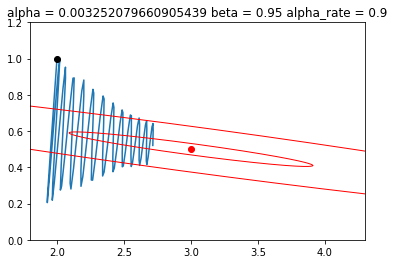

Final alpha: 0.003252079660905439


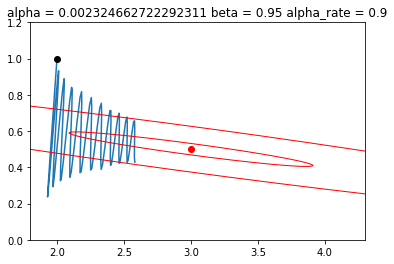

Final alpha: 0.002324662722292311


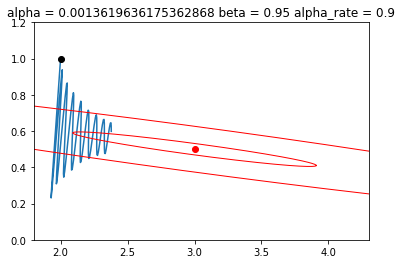

Final alpha: 0.0013619636175362868


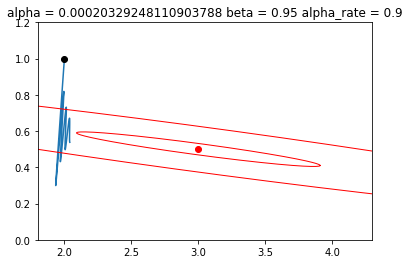

Final alpha: 0.00020329248110903788


In [2]:
different_alphas = [0.0024088, 0.0014088, 0.0010088, 0.0001008]

for alpha in different_alphas:
    inspect_momentum(alpha=alpha, beta=0.95, alpha_change_rate=0.9, n_epochs=100)

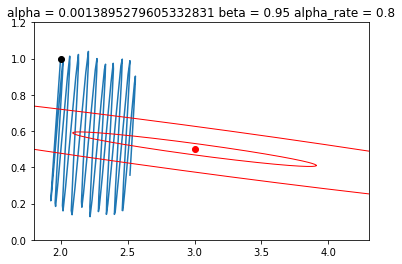

Final alpha: 0.0013895279605332831


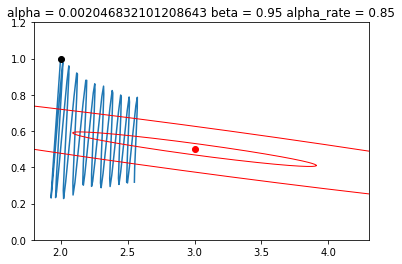

Final alpha: 0.002046832101208643


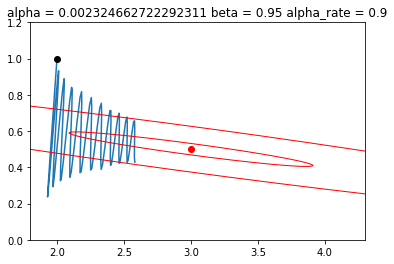

Final alpha: 0.002324662722292311


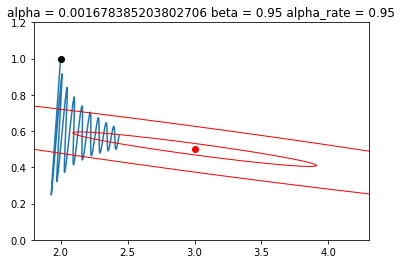

Final alpha: 0.001678385203802706


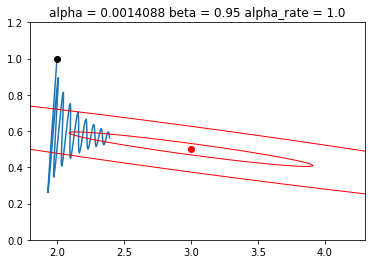

Final alpha: 0.0014088


In [3]:
different_alpha_change_rates = [0.8, 0.85, 0.9, 0.95, 1.]

for alpha_change_rate in different_alpha_change_rates:
    inspect_momentum(alpha=0.0014088, beta=0.95, alpha_change_rate=alpha_change_rate, n_epochs=100)

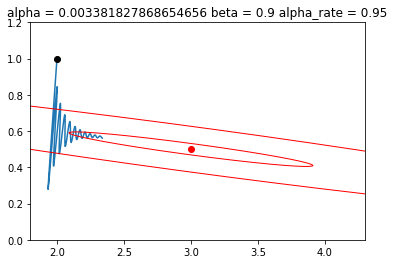

Final alpha: 0.003381827868654656


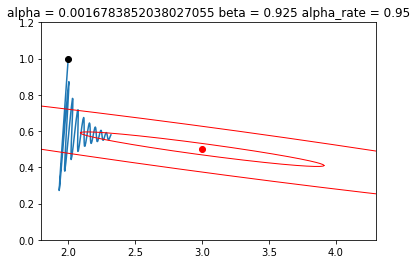

Final alpha: 0.0016783852038027055


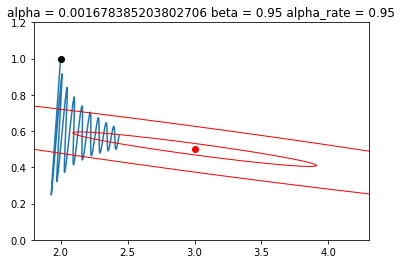

Final alpha: 0.001678385203802706


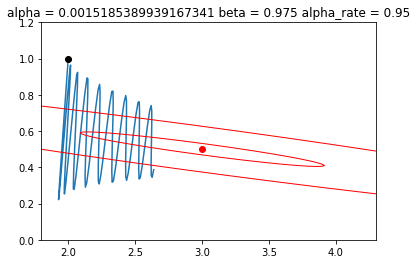

Final alpha: 0.0015185389939167341


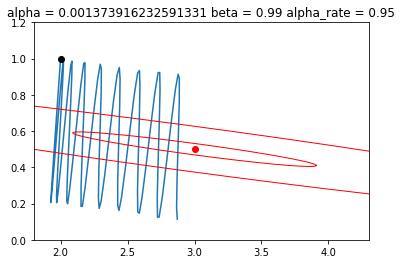

Final alpha: 0.001373916232591331


In [4]:
different_betas = [0.9, 0.925, 0.95, 0.975, 0.99]

for beta in different_betas:
    inspect_momentum(alpha=0.0014088, beta=beta, alpha_change_rate=0.95, n_epochs=100)